In [ ]:
import numpy as np 
import os 
import re 
import matplotlib.pyplot as plt
import pandas as pd
from skimage.transform import resize
import folium
import statistics
from folium.plugins import HeatMap
import geopy
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
from google.colab import drive
import urllib, urllib.parse, urllib.request
import json
from more_itertools import sort_together #cambiar el orden de las listas 

In [ ]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount('/content/drive')

Raiz=os.getcwdb() #vemos la dirección actual
dic_actual=os.chdir('/content/drive/My Drive/Folium/CDMX') 
dic=os.listdir(dic_actual)
print(dic)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['F-CDMX.ipynb', 'Sectores.geojson', 'Cuadrantes.geojson', 'GeoJSON - Carreteras pavimentadas y terracerías del continuo nacional de vías de comunicación.json', 'GeoJSON - Municipios.json', 'estado9.json', 'Alcadiasv1.GEOJSON', 'EntrenamientoG3.csv', 'prueba.geojson', 'prueba2.geojson', 'ejemplo.gdoc', 'ID_alcaldias_datos.csv', 'ejemplo.html']


In [ ]:
with open('Cuadrantes.geojson', encoding='utf-8-sig') as f:
    dct = json.load(f) #cuadrantes
with open('Sectores.geojson', encoding='utf-8-sig') as f:
    dct_1 = json.load(f) #Ssectores

FileNotFoundError: ignored

In [ ]:
color1 = {'fillColor': '#008000', 'color': '#008000'}
color2 = {'fillColor': '#00FFFFFF', 'color': '#00FFFFFF'}

In [ ]:
from folium.features import ColorLine
m = folium.Map(
    location=[19.4326018,-99.1332049],
    zoom_start=11,)
folium.GeoJson(dct, name="geojson",style_function=lambda x:color1).add_to(m) #cuadrantes 847
folium.GeoJson(dct_1, name="geojson",style_function=lambda x:color2).add_to(m) #sectores 73
m

In [ ]:
with open('estado9.json', encoding="utf8",errors='ignore') as f:
    dct_1 = json.load(f)

In [ ]:
m.save('ejemplo-Cuadrantes.html')

In [ ]:
gdf = gpd.GeoDataFrame(dct_1, crs="EPSG:4326")
gdf
type(gdf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  """Entry point for launching an IPython kernel.


geopandas.geodataframe.GeoDataFrame

In [ ]:
from pandas.io.json import json_normalize

In [ ]:
df = json_normalize(dct_1['features']) 
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


type    id properties.state_code properties.mun_code  \
0   Feature   265                     9                  10   
1   Feature   266                     9                  12   
2   Feature   267                     9                  15   
3   Feature   268                     9                  17   
4   Feature   269                     9                  11   
5   Feature   270                     9                   2   
6   Feature   271                     9                   3   
7   Feature   272                     9                  13   
8   Feature   273                     9                   4   
9   Feature   274                     9                  16   
10  Feature   275                     9                   8   
11  Feature   276                     9                   7   
12  Feature   277                     9                   6   
13  Feature   278                     9                   9   
14  Feature   279                     9                  14   
15  Feature  2456                     9                   5   

       properties.mun_name geometry.type  \
0             lvaro Obregn       Polygon   
1                  Tlalpan       Polygon   
2                Cuauhtmoc       Polygon   
3      Venustiano Carranza       Polygon   
4                   Tlhuac       Polygon   
5             Azcapotzalco       Polygon   
6                  Coyoacn       Polygon   
7               Xochimilco       Polygon   
8    Cuajimalpa de Morelos       Polygon   
9           Miguel Hidalgo       Polygon   
10  La Magdalena Contreras       Polygon   
11              Iztapalapa       Polygon   
12               Iztacalco       Polygon   
13              Milpa Alta       Polygon   
14            Benito Jurez       Polygon   
15       Gustavo A. Madero       Polygon   

                                 geometry.coordinates  
0   [[[2792840.7799, 814900.7861], [2791826.2067, ...  
1   [[[2803837.4179, 814493.989], [2803802.7437, 8...  
2   [[[2801183.9679, 832100.2936], [2801232.4964, ...  
3   [[[2808675.776, 831097.102], [2808714.9715, 83...  
4   [[[2814410.1515, 806558.3062], [2814360.1175, ...  
5   [[[2791951.8144, 837586.8128], [2791990.7217, ...  
6   [[[2801514.816, 820735.6906], [2801551.6179, 8...  
7   [[[2803837.4179, 814493.989], [2803887.1602, 8...  
8   [[[2787229.7905, 825329.2848], [2787388.7793, ...  
9   [[[2794075.1231, 832593.2251], [2794071.0767, ...  
10  [[[2791341.5077, 815598.3397], [2790101.676, 8...  
11  [[[2801501.7005, 820811.3581], [2801462.4648, ...  
12  [[[2808094.1846, 825698.5916], [2807850.8457, ...  
13  [[[2814502.2436, 806649.8789], [2814599.0649, ...  
14  [[[2796412.9037, 820845.2469], [2796291.0952, ...  
15  [[[2804455.193, 837639.0566], [2804460.0016, 8...

In [ ]:
df_Milpa = df[(df['properties.mun_name'] == 'Milpa Alta')]
print(df_Milpa)

       type   id properties.state_code properties.mun_code  \
13  Feature  278                     9                   9   

   properties.mun_name geometry.type  \
13          Milpa Alta       Polygon   

                                 geometry.coordinates  
13  [[[2814502.2436, 806649.8789], [2814599.0649, ...  


In [ ]:
df_Milpa['geometry.coordinates']

13    [[[2814502.2436, 806649.8789], [2814599.0649, ...
Name: geometry.coordinates, dtype: object

In [ ]:
with open('Alcadiasv1.GEOJSON', encoding="utf8",errors='ignore') as f:
    dct_2 = json.load(f)

In [ ]:
m = folium.Map(
    location=[19.4326018,-99.1332049],
    zoom_start=11,)
folium.GeoJson(dct_2, name="geojson").add_to(m) #sectores 73
m

In [ ]:
dct_1

{'features': [{'geometry': {'coordinates': [[[2792840.7799, 814900.7861],
      [2791826.2067, 815095.1603],
      [2791341.5077, 815598.3397],
      [2791221.3518, 816521.6791],
      [2792090.9399, 817265.8306],
      [2792632.574, 818304.1861],
      [2791820.1932, 818271.1328],
      [2790122.5242, 817514.8069],
      [2789493.1455, 816935.7355],
      [2788833.1309, 817338.639],
      [2787617.6619, 817104.9719],
      [2786521.5926, 815635.2714],
      [2786150.2752, 815648.9058],
      [2785803.4238, 812502.6893],
      [2784993.4617, 811982.7872],
      [2784484.9628, 810875.7411],
      [2782813.3601, 809546.5529],
      [2781590.9064, 809289.8259],
      [2780659.8543, 807256.6497],
      [2780783.1235, 806606.7006],
      [2780566.6489, 806598.4608],
      [2780570.7396, 810184.518],
      [2781206.6735, 811276.6947],
      [2781364.9239, 812088.8281],
      [2781186.8387, 813588.9866],
      [2781712.9493, 814766.9402],
      [2782354.6306, 814889.7326],
      [2783906.2235

### Mapas interactivos con cordenadas

In [ ]:
df = pd.read_csv("EntrenamientoG3.csv")

In [ ]:
df

Unnamed: 0  ID_EVENTO  ID_DESCRIPCION_EVENTO_x FECHA_DESCRIPCION_x  \
0              0        121                    823.0            21/01/21   
1              1        130                   1830.0            21/01/21   
2              2        774                   7139.0            22/01/21   
3              3        532                   5446.0            21/01/21   
4              4        532                   5446.0            21/01/21   
...          ...        ...                      ...                 ...   
9995        9995      43596                 279983.0            07/03/21   
9996        9996      43608                 279915.0            07/03/21   
9997        9997      43683                 280888.0            07/03/21   
9998        9998      43635                 280986.0            07/03/21   
9999        9999      47465                 325182.0            10/03/21   

                                          DESCRIPCION_x  \
0     Incidente 2021.01.21 5:32:53 234 28834 creado ...   
1                            SE TRASLADA POR SUS MEDIOS   
2     REFIERE SU FAMILIAR PRESENTA DISNEA DE PEQUEÑO...   
3     NOMBRE: MARIA CHRISTINA APELLIDO PATERNO: PERE...   
4     NOMBRE: MARIA CHRISTINA APELLIDO PATERNO: PERE...   
...                                                 ...   
9995               SE COORDINA CON LA BASE UNIVERSIDAD    
9996                            ACTIVA DESDE HACE 8 MIN   
9997                        FOLIO CAD: C5/210307/03415    
9998  CON LA INFORMACION PROPORCIONADA, SE PROCEDE A...   
9999                                                 55   

      ID_DIRECCION_EVENTO_x  ID_COLONIA_x  ID_MUNICIPIO_x  ID_ESTADO_x  \
0                       601       13411.0            16.0          9.0   
1                       646       12792.0            11.0          9.0   
2                      3883       12598.0            10.0          9.0   
3                      2668       12038.0             6.0          9.0   
4                      2668       12038.0             6.0          9.0   
...                     ...           ...             ...          ...   
9995                 200716       11642.0             3.0          9.0   
9996                 200796       13429.0            16.0          9.0   
9997                 201254       13520.0            15.0          9.0   
9998                 200957       13497.0            17.0          9.0   
9999                 224642       12288.0             7.0          9.0   

      LATITUD_x  ...  ID_USO_VEHICULO_y ID_ESTADO_FISICO_VEHICULO_y  \
0     19.444850  ...                NaN                         NaN   
1     19.299234  ...                NaN                         NaN   
2     19.370419  ...                NaN                         NaN   
3     19.389898  ...                NaN                         NaN   
4     19.389898  ...                NaN                         NaN   
...         ...  ...                ...                         ...   
9995  19.322658  ...                NaN                         NaN   
9996  19.400473  ...                NaN                         NaN   
9997  19.429253  ...                NaN                         NaN   
9998  19.414751  ...                NaN                         NaN   
9999  19.296850  ...                NaN                         NaN   

     NUMERO_TELEFONO              FOLIO ID_DISPOSITIVO  FECHA_INICIO  \
0         5537314897  C5/20210121/00043            NaN      21/01/21   
1         5612821575  C5/20210121/00046            NaN      21/01/21   
2         5575757551  C5/20210121/00289            NaN      21/01/21   
3         5563575986  C5/20210121/00189            NaN      21/01/21   
4         5563575986  C5/20210121/00189            NaN      21/01/21   
...              ...                ...            ...           ...   
9995      5530417718  C5/20210307/00229            NaN      07/03/21   
9996      5556362900  C5/20210307/00240            NaN      07/03/

In [ ]:
[df['ID_MUNICIPIO_x'] == 16]
data_filter = df[df['ID_MUNICIPIO_x'] == 16]
index=list(data_filter.index)
print(index)

[0, 10, 14, 41, 52, 132, 171, 172, 174, 175, 176, 178, 187, 208, 242, 243, 373, 413, 414, 421, 454, 474, 475, 484, 487, 520, 521, 562, 563, 565, 566, 581, 584, 596, 624, 625, 629, 630, 679, 717, 718, 758, 807, 860, 906, 963, 964, 988, 989, 998, 1039, 1090, 1091, 1139, 1142, 1178, 1233, 1324, 1325, 1328, 1343, 1482, 1487, 1497, 1498, 1731, 1789, 1790, 1794, 1795, 1796, 1802, 1841, 1842, 1854, 1855, 1865, 1886, 1887, 1930, 2012, 2013, 2042, 2102, 2139, 2146, 2155, 2195, 2196, 2207, 2208, 2209, 2210, 2211, 2212, 2257, 2258, 2377, 2378, 2392, 2393, 2394, 2396, 2397, 2432, 2433, 2444, 2445, 2470, 2483, 2484, 2506, 2534, 2535, 2546, 2579, 2651, 2652, 2715, 2773, 2774, 2802, 2803, 2805, 2837, 2838, 2839, 2863, 2886, 2942, 2946, 2949, 2989, 3007, 3008, 3009, 3012, 3013, 3020, 3021, 3031, 3032, 3070, 3071, 3097, 3106, 3110, 3111, 3116, 3117, 3128, 3129, 3130, 3149, 3288, 3320, 3321, 3336, 3337, 3381, 3385, 3386, 3387, 3403, 3409, 3423, 3496, 3507, 3513, 3514, 3520, 3521, 3538, 3611, 3612, 3613,

In [ ]:
df_prueba=df.iloc[index, :]
lad=df_prueba['LATITUD_x'].tolist()
log=df_prueba['LONGITUD_x'].tolist()

In [ ]:
m = folium.Map(
    location=[19.4326018,-99.1332049],
    zoom_start=11,)
folium.GeoJson(dct_2, name="geojson").add_to(m) #delegaciones
for i in range(len(index)):
  folium.Marker(location=[lad[i], log[i]],popup="ID_EVENTO:"+str(df['ID_EVENTO'].tolist()[index[i]])+"\n"+"EDAD:"+str(df['DESCRIPCION_x'].tolist()[index[i]]), icon=folium.Icon(icon="remove"), ).add_to(m)
m

In [ ]:
[df['FECHA_EVENTO'] == '21/01/21']
data_filter = df[df['FECHA_EVENTO'] == '21/01/21']
index=list(data_filter.index)
print(index)
df_prueba=df.iloc[index, :]
lad=df_prueba['LATITUD_x'].tolist()
log=df_prueba['LONGITUD_x'].tolist()
longs=log
lats=lad
vec=[1]*(len(lad))
# Calcular la media de las latitudes y las longitudes para centrar el mapa
mediaLong = statistics.mean(longs)
mediaLat = statistics.mean(lats)

# Crear un objeto de mapa base Map()
mapa = folium.Map(location=[mediaLat, mediaLong], zoom_start = 12)

# Crear una capa de mapa de calor
mapa_calor = HeatMap( list(zip(lats, longs, vec)),
                   min_opacity=0.2,
                   max_val=max(vec),
                   radius=30, 
                   blur=50, 
                   max_zoom=1)

#Creamos el marcador de Centro de Gravedad
tooltip = 'Centro de gravedad'
#folium.Marker([centro_gravedad['lats'], centro_gravedad['longs']], popup="Centro", tooltip = tooltip).add_to(mapa)
folium.GeoJson(dct_2, name="geojson").add_to(mapa)
# Adherimos la capa de mapa de calor al mapa principal
mapa_calor.add_to(mapa)
mapa

[0, 1, 2, 3, 4, 5, 6, 7, 57, 58, 453, 454, 455, 456, 457, 458, 463, 464, 465, 839, 840, 841, 842, 843, 844, 845, 846, 964, 965, 966, 967, 968, 969, 1093, 1094, 1098, 1099, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1232, 1526, 1527, 1642, 1643, 1768, 1833, 1868, 1869, 2262, 2263, 2264, 2265, 2551, 2552, 2556, 2557, 2867, 2868, 3127, 3128, 3129, 3130, 3133, 3409, 3410, 3411, 3702, 3743, 3930, 3973, 4015, 4016, 4017, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4389, 4426, 4498, 4499, 4500, 4501, 4589, 4592, 4593, 4594, 4740, 4819, 4820, 4821, 4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 5097, 5206, 5207, 5274, 5275, 5308, 5398, 5427, 5433, 5557, 5558, 5559, 5560, 7622, 7877, 7878, 8933, 9074, 9075, 9649, 9650]


In [ ]:
m.save('ejemplo-calor.html')

In [ ]:
[df['NOMBRE_x'] == '21/01/21']
data_filter = df[df['FECHA_EVENTO'] == '21/01/21']
index=list(data_filter.index)
print(index)

df_prueba=df.iloc[index, :]
lad=df_prueba['LATITUD_x'].tolist()
log=df_prueba['LONGITUD_x'].tolist()
longs=log
lats=lad
# Calcular la media de las latitudes y las longitudes para centrar el mapa
mediaLong = statistics.mean(longs)
mediaLat = statistics.mean(lats)

# Crear un objeto de mapa base Map()
mapa = folium.Map(location=[mediaLat, mediaLong], zoom_start = 12)

# Crear una capa de mapa de calor
mapa_calor = HeatMap( list(zip(lats, longs, vec)),
                   min_opacity=0.2,
                   max_val=max(vec),
                   radius=30, 
                   blur=50, 
                   max_zoom=1)

#Creamos el marcador de Centro de Gravedad
tooltip = 'Centro de gravedad'
#folium.Marker([centro_gravedad['lats'], centro_gravedad['longs']], popup="Centro", tooltip = tooltip).add_to(mapa)

# Adherimos la capa de mapa de calor al mapa principal
mapa_calor.add_to(mapa)
mapa

[0, 1, 2, 3, 4, 5, 6, 7, 57, 58, 453, 454, 455, 456, 457, 458, 463, 464, 465, 839, 840, 841, 842, 843, 844, 845, 846, 964, 965, 966, 967, 968, 969, 1093, 1094, 1098, 1099, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1232, 1526, 1527, 1642, 1643, 1768, 1833, 1868, 1869, 2262, 2263, 2264, 2265, 2551, 2552, 2556, 2557, 2867, 2868, 3127, 3128, 3129, 3130, 3133, 3409, 3410, 3411, 3702, 3743, 3930, 3973, 4015, 4016, 4017, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4389, 4426, 4498, 4499, 4500, 4501, 4589, 4592, 4593, 4594, 4740, 4819, 4820, 4821, 4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 5097, 5206, 5207, 5274, 5275, 5308, 5398, 5427, 5433, 5557, 5558, 5559, 5560, 7622, 7877, 7878, 8933, 9074, 9075, 9649, 9650]


In [ ]:
df.columns.values

array(['Unnamed: 0', 'ID_EVENTO', 'ID_DESCRIPCION_EVENTO_x',
       'FECHA_DESCRIPCION_x', 'DESCRIPCION_x', 'ID_DIRECCION_EVENTO_x',
       'ID_COLONIA_x', 'ID_MUNICIPIO_x', 'ID_ESTADO_x', 'LATITUD_x',
       'LONGITUD_x', 'LUGAR_x', 'CALLE_x', 'CODIGO_POSTAL_x',
       'FECHA_CREACION_x', 'ID_DESCRIPCION_EVENTO_y',
       'FECHA_DESCRIPCION_y', 'DESCRIPCION_y', 'ID_DIRECCION_EVENTO_y',
       'ID_COLONIA_y', 'ID_MUNICIPIO_y', 'ID_ESTADO_y', 'LATITUD_y',
       'LONGITUD_y', 'LUGAR_y', 'CALLE_y', 'CODIGO_POSTAL_y',
       'FECHA_CREACION_y', 'ID_PERSONA_INVOLUCRADA_x', 'NOMBRE_x',
       'APELLIDO_PATERNO_x', 'APELLIDO_MATERNO_x', 'SEXO_x', 'EDAD_x',
       'FECHA_CREACION_x.1', 'FECHA_MODIFICACION_x', 'ID_TIPO_PERSONA_x',
       'ID_PERSONA_ORIGEN_x', 'ID_DESCRIPCION_EVENTO_x.1',
       'FECHA_DESCRIPCION_x.1', 'DESCRIPCION_x.1',
       'ID_DIRECCION_EVENTO_x.1', 'ID_COLONIA_x.1', 'ID_MUNICIPIO_x.1',
       'ID_ESTADO_x.1', 'LATITUD_x.1', 'LONGITUD_x.1', 'LUGAR_x.1',
       'CALLE_x.1

In [ ]:
m.save('ejemplo-calor.html')

In [ ]:
df['NUMERO_PLACA_x']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
9995    NJT3999
9996        NaN
9997        NaN
9998        NaN
9999        NaN
Name: NUMERO_PLACA_x, Length: 10000, dtype: object

In [ ]:
[df['ID_COLONIA_x'] == 12 | df['EDAD_x'] == 19]
data_filter = df[df['ID_COLONIA_x'] == 12 | df['EDAD_x'] == 19]
index=list(data_filter.index)
print(index)

df_prueba=df.iloc[index, :]
lad=df_prueba['LATITUD_x'].tolist()
log=df_prueba['LONGITUD_x'].tolist()
longs=log
lats=lad
vec=[1]*(len(lad))
# Calcular la media de las latitudes y las longitudes para centrar el mapa
mediaLong = statistics.mean(longs)
mediaLat = statistics.mean(lats)

# Crear un objeto de mapa base Map()
mapa = folium.Map(location=[mediaLat, mediaLong], zoom_start = 12)

# Crear una capa de mapa de calor
mapa_calor = HeatMap( list(zip(lats, longs, vec)),
                   min_opacity=0.2,
                   max_val=max(vec),
                   radius=30, 
                   blur=50, 
                   max_zoom=1)

#Creamos el marcador de Centro de Gravedad
#tooltip = 'Centro de gravedad'
#folium.Marker([centro_gravedad['lats'], centro_gravedad['longs']], popup="Centro", tooltip = tooltip).add_to(mapa)

# Adherimos la capa de mapa de calor al mapa principal
mapa_calor.add_to(mapa)
mapa

TypeError: ignored

In [ ]:
# Calcular la media de las latitudes y las longitudes para centrar el mapa
mediaLong = statistics.mean(longs)
mediaLat = statistics.mean(lats)

# Crear un objeto de mapa base Map()
mapa = folium.Map(location=[mediaLat, mediaLong], zoom_start = 12)

# Crear una capa de mapa de calor
mapa_calor = HeatMap( list(zip(lats, longs, vec)),
                   min_opacity=0.2,
                   max_val=max(vec),
                   radius=50, 
                   blur=50, 
                   max_zoom=1)

#Creamos el marcador de Centro de Gravedad
tooltip = 'Centro de gravedad'
folium.Marker([centro_gravedad['lats'], centro_gravedad['longs']], popup="Centro", tooltip = tooltip).add_to(mapa)

# Adherimos la capa de mapa de calor al mapa principal
mapa_calor.add_to(mapa)
mapa

NameError: ignored

In [ ]:
# Creación de df para estadisticas de la alcaldías. 


###   Creacion de mapas por colores 

In [ ]:
#Eventos por alcaldía. 
data_filter = df[df['ID_MUNICIPIO_x'] == 10] #Alvaro Obregon
index=list(data_filter.index)
t_eventos=len(index)

eventos_delegaciones=[]
for i in range(16):
  data_filter = df[df['ID_MUNICIPIO_x'] == i++2]
  index=list(data_filter.index)
  t_eventos=len(index)
  eventos_delegaciones.append(t_eventos)
print(eventos_delegaciones)

[601, 569, 163, 1169, 535, 2144, 221, 49, 700, 251, 640, 412, 392, 975, 510, 667]


In [ ]:
id_alcaldias_ord=['alcaldias.6','alcaldias.13','alcaldias.8','alcaldias.10','alcaldias.9','alcaldias.5',
              'alcaldias.12','alcaldias.14','alcaldias.15','alcaldias.2','alcaldias.1','alcaldias.16',
              'alcaldias.7','alcaldias.4','alcaldias.11','alcaldias.3'] #alcaldias ordenadas

In [ ]:
id_alcaldias=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

In [ ]:
df_datos_alc = pd.DataFrame()
df_datos_alc['Alcaldias'] = id_alcaldias_ord
df_datos_alc['Total_Eventos'] = eventos_delegaciones

df_datos_alc.to_csv('ID_alcaldias_datos.csv')

In [ ]:
m = folium.Map(
    location=[19.4326018,-99.1332049],
    zoom_start=11,)
folium.GeoJson(dct_2, name="geojson").add_to(m) #alcaldías de la CDMX 
users=df_datos_alc

users=df_datos_alc

folium.Choropleth(
geo_data=dct_2,
name='choropleth',
data=users,
columns=['Alcaldias', 'Total_Eventos'],
key_on='id',
fill_color='YlGn',
fill_opacity=0.7,
line_opacity=0.1,
legend_name='Eventos por Alcaldía'
).add_to(m)

folium.LayerControl().add_to(m)

m


In [ ]:
from pandas import json_normalize
df_alcaldias = json_normalize(dct_2['features']) 
df_alcaldias

type            id geometry_name geometry.type  \
0   Feature   alcaldias.1      the_geom  MultiPolygon   
1   Feature   alcaldias.2      the_geom  MultiPolygon   
2   Feature   alcaldias.3      the_geom  MultiPolygon   
3   Feature   alcaldias.4      the_geom  MultiPolygon   
4   Feature   alcaldias.5      the_geom  MultiPolygon   
5   Feature   alcaldias.6      the_geom  MultiPolygon   
6   Feature   alcaldias.7      the_geom  MultiPolygon   
7   Feature   alcaldias.8      the_geom  MultiPolygon   
8   Feature   alcaldias.9      the_geom  MultiPolygon   
9   Feature  alcaldias.10      the_geom  MultiPolygon   
10  Feature  alcaldias.11      the_geom  MultiPolygon   
11  Feature  alcaldias.12      the_geom  MultiPolygon   
12  Feature  alcaldias.13      the_geom  MultiPolygon   
13  Feature  alcaldias.14      the_geom  MultiPolygon   
14  Feature  alcaldias.15      the_geom  MultiPolygon   
15  Feature  alcaldias.16      the_geom  MultiPolygon   

                                 geometry.coordinates  properties.fid  \
0   [[[[-99.19628608, 19.30227817], [-99.19595355,...               1   
1   [[[[-98.97892778, 19.32393054], [-98.97856031,...               2   
2   [[[[-99.10894589, 19.45273363], [-99.10889129,...               3   
3   [[[[-99.12919094, 19.46246652], [-99.12884252,...               4   
4   [[[[-99.05813288, 19.40071958], [-99.05813572,...               5   
5   [[[[-99.18230697, 19.50747925], [-99.1822908, ...               6   
6   [[[[-99.13679463, 19.40155672], [-99.13682023,...               7   
7   [[[[-99.25697935, 19.40043169], [-99.25693563,...               8   
8   [[[[-99.05583626, 19.42196123], [-99.05588835,...               9   
9   [[[[-99.11859757, 19.58446172], [-99.11690614,...              10   
10  [[[[-99.19057942, 19.46793632], [-99.19066066,...              11   
11  [[[[-99.208589, 19.33609617], [-99.20867402, 1...              12   
12  [[[[-99.13923188, 19.35686529], [-99.13772165,...              13   
13  [[[[-98.99723374, 19.22731069], [-98.99744705,...              14   
14  [[[[-99.18870662, 19.39474765], [-99.18867971,...              15   
15  [[[[-99.09869649, 19.31964142], [-99.09848874,...              16   

         properties.nomgeo properties.cve_mun properties.cve_ent  \
0                  Tlalpan                012                 09   
1                 TlÃ¡huac                011                 09   
2      Venustiano Carranza                017                 09   
3              CuauhtÃ©moc                015                 09   
4               Iztapalapa                007                 09   
5             Azcapotzalco                002                 09   
6           Benito JuÃ¡rez                014                 09   
7    Cuajimalpa de Morelos                004                 09   
8                Iztacalco                006                 09   
9        Gustavo A. Madero                005                 09   
10          Miguel Hidalgo                016                 09   
11  La Magdalena Contreras                008                 09   
12               CoyoacÃ¡n                003                 09   
13              Milpa Alta                009                 09   
14        Ãlvaro ObregÃ³n                010                 09   
15              Xochimilco                013                 09   

   properties.cvegeo  properties.style.weight  properties.style.opacity  \
0              09012                        1                       0.1   
1              09011                        1                       0.1   
2              09017                        1                       0.1   
3              09015                        1                       0.1   
4              09007                        1                       0.1   
5              09002                        1                       0.1   
6              09014                        1                       0.1   
7              09004                  

In [ ]:
#Eventos por alcaldía. 
data_filter = df[(df['SEXO_x.1'] == 2) & (df['EDAD_x'] == 45)] # Hombres mayores a 18 años
index=list(data_filter.index)
t_eventos=len(index)
index
df_prueba=df.iloc[index, :]
lad=df_prueba['LATITUD_x'].tolist()
log=df_prueba['LONGITUD_x'].tolist()

m = folium.Map(
    location=[19.4326018,-99.1332049],
    zoom_start=11,)
folium.GeoJson(dct_2, name="geojson").add_to(m) #delegaciones

for i in range(len(index)):

  folium.Marker(location=[lad[i], log[i]],popup="ID_EVENTO:"+str(df['ID_EVENTO'].tolist()[index[i]])+"\n"+"EDAD:"+str(df['EDAD_x'].tolist()[index[i]]), icon=folium.Icon(color="orange",icon="remove"), ).add_to(m)

folium.GeoJson(dct_1, name="geojson",style_function=lambda x:color2).add_to(m) #sectores 73
m

In [ ]:
### eventos considerados 
#Eventos por alcaldía. 
data_filter = df[df['ID_MUNICIPIO_x'] == 10] #Alvaro Obregon
index=list(data_filter.index)
t_eventos=len(index)

eventos_delegaciones=[]
for i in range(16):
  data_filter = df[df['ID_MUNICIPIO_x'] == i++2]
  index=list(data_filter.index)
  t_eventos=len(index)
  eventos_delegaciones.append(t_eventos)
print(eventos_delegaciones)

In [ ]:
with open('prueba2.geojson', encoding='utf-8-sig') as f:
    dct_3 = json.load(f)

from folium.features import ColorLine

m = folium.Map(
    location=[19.4326018,-99.1332049],
    zoom_start=11,)

folium.GeoJson(dct_3, name="geojson").add_to(m) #sectores 73
m

In [ ]:
m.save('ejemplo.html')

### Agregar un punto al mapa a travez de un Servicio externo 

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
#Buffon 46, Anzures, Miguel Hidalgo, 11590 Ciudad de México, CDMX

In [ ]:
lugar=input() #Buffon 46, Anzures, Miguel Hidalgo, CDMX
geolocator = Nominatim()
localizacion = geolocator.geocode(lugar, timeout=2, exactly_one=False)
print(localizacion) 

Buffon 46, Anzures, Miguel Hidalgo, 11590 Ciudad de México, CDMX


/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


[Location(Calle Buffon, Colonia Anzures, Miguel Hidalgo, Ciudad de México, 11590, México, (19.4330486, -99.1776877, 0.0))]


In [ ]:
Latitude = "19.4330486"
Longitude = "-99.1776877"
  
location = geolocator.reverse(Latitude+","+Longitude) 
print(location)

Calle Buffon, Colonia Anzures, Miguel Hidalgo, Ciudad de México, 11590, México


Medir disnatancías

In [ ]:
from geopy.distance import geodesic

126.91409121366695

In [ ]:
d1 = [19.249098799296945, -99.05776824932747]
d2 = [19.253569974764606, -99.06237694375099]
geodesic(d1, d2).kilometers

0.6926238186191573

In [ ]:
locs=[d1,d2]

In [ ]:
m = folium.Map(
    location=[19.4326018,-99.1332049],
    zoom_start=11,)
folium.GeoJson(dct_1, name="geojson").add_to(m) #sectores 73
folium.Marker(d1,popup="Evento 1"+lugar, icon=folium.Icon(color="blue",icon="glyphicon glyphicon-home"), ).add_to(m)
folium.Marker(d2,popup="Evento 2"+lugar, icon=folium.Icon(color="blue",icon="glyphicon glyphicon-home"), ).add_to(m)

folium.PolyLine(locs,line_opacity=0.8,color='red').add_to(m)

m

In [ ]:
cordenadas=localizacion[0][1]
cordenadas=list(cordenadas)
cordenadas

m = folium.Map(
    location=[19.4326018,-99.1332049],
    zoom_start=11,)
folium.GeoJson(dct_1, name="geojson").add_to(m) #sectores 73

folium.Marker(location=cordenadas,popup="Punto"+lugar, icon=folium.Icon(color="blue",icon="glyphicon glyphicon-home"), ).add_to(m)

m

### Puntos más cerca a un cuadrante 



In [ ]:
m = folium.Map(
    location=[19.4326018,-99.1332049],
    zoom_start=11,)
folium.GeoJson(dct_1, name="geojson").add_to(m) #sectores 73

folium.Marker(location=[19.34350202,-99.05860146],popup="Sector:", icon=folium.Icon(color="red",icon="glyphicon glyphicon-flag"), ).add_to(m)

m

In [ ]:
from pandas import json_normalize
df_sectores = json_normalize(dct_1['features']) 
df_sectores

type properties.sector properties.cve_mun properties.municipio  \
0   Feature    ABASTO-REFORMA               9007           IZTAPALAPA   
1   Feature             ALPES               9010       ALVARO OBREGON   
2   Feature   ANGEL-ZONA ROSA               9015           CUAUHTEMOC   
3   Feature            ARAGON               9005     GUSTAVO A MADERO   
4   Feature            ARENAL               9017  VENUSTIANO CARRANZA   
..      ...               ...                ...                  ...   
67  Feature        TLATELOLCO               9015           CUAUHTEMOC   
68  Feature       UNIVERSIDAD               9003             COYOACAN   
69  Feature         XOTEPINGO               9003             COYOACAN   
70  Feature         ZAPOTITLA               9011              TLAHUAC   
71  Feature          ZARAGOZA               9017  VENUSTIANO CARRANZA   

   geometry.type                               geometry.coordinates  
0        Polygon  [[[-99.05756813, 19.34308372], [-99.05860146, ...  
1        Polygon  [[[-99.26827426, 19.30509902], [-99.26857616, ...  
2        Polygon  [[[-99.17742211, 19.42042817], [-99.17772734, ...  
3        Polygon  [[[-99.07539947, 19.44866099], [-99.07949133, ...  
4        Polygon  [[[-99.08745149, 19.4079413], [-99.08423728, 1...  
..           ...                                                ...  
67       Polygon  [[[-99.12483821, 19.4517562], [-99.12498601, 1...  
68  MultiPolygon  [[[[-99.18029838, 19.30772073], [-99.18029896,...  
69       Polygon  [[[-99.14769985, 19.30095799], [-99.15162232, ...  
70       Polygon  [[[-99.0264017, 19.29784629], [-99.02522141, 1...  
71       Polygon  [[[-99.08745149, 19.4079413], [-99.09029172, 1...  

[72 rows x 6 columns]

In [ ]:
len(df_sectores['type'].tolist())

72

In [ ]:
lista_cordenadas_sector=[]
Y = [1,0]

for j in range(len(df_sectores['type'].tolist())):
  lista_cordenadas_0=df_sectores['geometry.coordinates'].iloc[j]
  cor=lista_cordenadas_0[0][0]
  cor=list(sort_together([Y,cor])[1])
  lista_cordenadas_sector.append(cor)
print(lista_cordenadas_sector)
print(len(lista_cordenadas_sector))

[[19.34308372, -99.05756813], [19.30509902, -99.26827426], [19.42042817, -99.17742211], [19.44866099, -99.07539947], [19.4079413, -99.08745149], [19.40425509, -99.12572428], [19.44247119, -99.16251312], [19.39243739, -99.23926135], [19.35754301, -99.12185068], [19.45884582, -99.17883031], [19.28510304, -99.12461698], [19.42281081, -99.12607528], [19.43699137, -99.10685059], [19.43021993, -99.14147195], [19.3304043, -99.15846436], [19.35028792, -99.30001004], [19.52644913, -99.12851101], [19.44999312, -99.10188648], [19.45884582, -99.17883031], [19.29984584, -99.10069169], [19.35964098, -99.1716109], [19.28882408, -99.24178889], [19.34972091, -99.30231174], [19.30430901, -99.08744918], [19.26354572, -99.24554233], [19.33289147, -99.11036916], [19.4829938, -99.18311978], [19.22651635, -99.15571914], [19.37723098, -99.13541011], [19.2442199, -99.14924243], [19.46520619, -99.1427511], [19.46564025, -99.14150909], [19.40573025, -99.11369877], [19.2044232, -99.00211778], [19.42281081, -99.12

In [ ]:
for i in range(len(lista_cordenadas_sector)):
  sis_cor=lista_cordenadas_sector[i]

In [ ]:
#Eventos por alcaldía. 
m = folium.Map(
    location=[19.4326018,-99.1332049],
    zoom_start=11,)
folium.GeoJson(dct_1, name="geojson").add_to(m) #sectores 73
#folium.GeoJson(dct_2, name="geojson").add_to(m) #delegaciones
for i in range(len(lista_cordenadas_sector)):
  sis_cor=lista_cordenadas_sector[i]

  folium.Marker(location=sis_cor,popup="SECTOR:"+str(df_sectores['properties.sector'].tolist()[i])+"\n", icon=folium.Icon(color="red",icon="glyphicon glyphicon-flag"), ).add_to(m)

folium.GeoJson(dct_1, name="geojson").add_to(m) #sectores 73

m


NameError: ignored


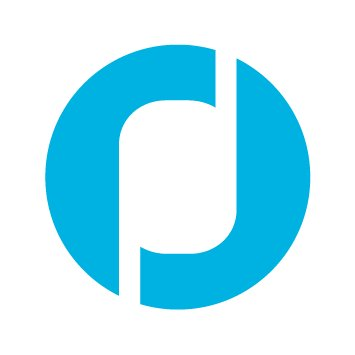

In [ ]:
import sys
sys.path.insert(0,'..')
import folium
from folium import plugins

m = folium.Map(location=[19.4326018,-99.1332049],zoom_start=11,tiles=tiles[3])
folium.raster_layers.ImageOverlay('p.jpg',
                    #[[-40,-40],[40,40]],
                    [[-82*(1/8), -180*(1/8)], [82*(1/8), 180*(1/8)]],
                    origin='lower',
                    opacity=0.8,
                   ).add_to(m)

folium.LayerControl().add_to(m)

m

